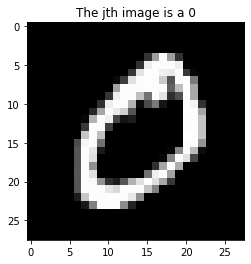

In [2]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn import svm
from sklearn import preprocessing
from scipy.io import arff
import matplotlib.pyplot as plt


# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

# plot one digital image
j = 1
plt.title('The jth image is a {label}'.format(label=int(y[j]))) 
plt.imshow(X[j].reshape((28,28)), cmap='gray')
plt.show()

#Preprocessing: scale data with zero mean and unit variance
X = preprocessing.scale(X)



In [4]:
# Extract out the digits "4" and "9"
X4 = X[y=='4',:]
X9 = X[y=='9',:]
y4 = 4*np.ones((len(X4),), dtype=int)
y9 = 9*np.ones((len(X9),), dtype=int)

# X_full = np.concatenate(X4, X9)
# y_full = np.concatenate(y4,y9)

In [5]:
# split the data into test and train (which further splitted into train and validation)

X_train = np.concatenate((X4[0:3000], X9[0:3000]), axis=0)
Y_train = np.concatenate((y4[0:3000], y9[0:3000]), axis=0)
X_validation = np.concatenate((X4[3000:4000], X9[3000:4000]), axis=0)
Y_validation = np.concatenate((y4[3000:4000], y9[3000:4000]), axis=0)
X_test = np.concatenate((X4[4000:], X9[4000:]), axis=0)
Y_test = np.concatenate((y4[4000:], y9[4000:]), axis=0)

In [6]:
C_grid = np.logspace(-3, 3, 10)
print(C_grid)

[1.00000000e-03 4.64158883e-03 2.15443469e-02 1.00000000e-01
 4.64158883e-01 2.15443469e+00 1.00000000e+01 4.64158883e+01
 2.15443469e+02 1.00000000e+03]


In [7]:
######## DEGREE=2 #########

Pe = np.zeros(10)

from sklearn import svm
for i in range (10):
    clf= svm.SVC(C=C_grid[i],kernel='poly', degree=2)
    clf.fit(X_train,Y_train)
    Pe[i] = 1 - clf.score(X_validation,Y_validation)
    print(Pe[i])



0.497
0.4335
0.05400000000000005
0.026000000000000023
0.01649999999999996
0.015000000000000013
0.013000000000000012
0.013499999999999956
0.013499999999999956
0.013499999999999956


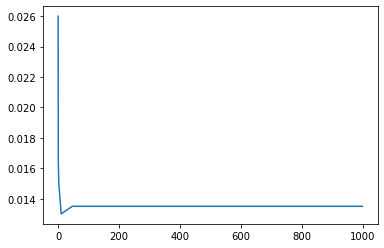

In [11]:
###### PLOTS #######


plt.plot(C_grid[3:10], Pe[3:10])
plt.show()

In [12]:
print("Best value of C choosen is", C_grid[7])

Best value of C choosen is 46.41588833612773


In [14]:
X_train_val = np.concatenate((X4[0:4000], X9[0:4000]), axis=0)
Y_train_val = np.concatenate((y4[0:4000], y9[0:4000]), axis=0)

clf= svm.SVC(C=C_grid[7],kernel='poly', degree=2)
clf.fit(X_train_val,Y_train_val)

Pe = 1 - clf.score(X_test,Y_test)


In [16]:
print("Error for degree 2:",Pe)
print("Best value of C choosen is", C_grid[7])

Error for degree 2: 0.012452438602559623
Best value of C choosen is 46.41588833612773


In [20]:
##### DEGREE = 1 #######

Pe11 = np.zeros(10)
from sklearn import svm
for i in range (10):
    clf= svm.SVC(C=C_grid[i],kernel='poly', degree=1)
    clf.fit(X_train,Y_train)
    Pe11[i] = 1 - clf.score(X_validation,Y_validation)
    print(Pe11[i])

0.14200000000000002
0.10650000000000004
0.05449999999999999
0.044499999999999984
0.033499999999999974
0.026000000000000023
0.03249999999999997
0.03749999999999998
0.04200000000000004
0.050000000000000044


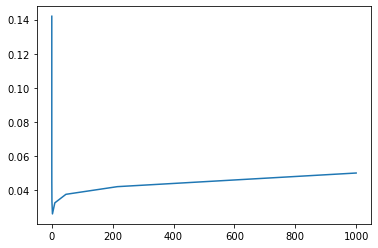

In [21]:
plt.plot(C_grid, Pe11)
plt.show()

In [22]:
X_train_val = np.concatenate((X4[0:4000], X9[0:4000]), axis=0)
Y_train_val = np.concatenate((y4[0:4000], y9[0:4000]), axis=0)

clf= svm.SVC(C=C_grid[6],kernel='poly', degree=1)
clf.fit(X_train_val,Y_train_val)

Pe1 = 1 - clf.score(X_test,Y_test)

In [23]:
print("Error for degree 1:", Pe1)
print("Best value of C choosen is:", C_grid[6])

Error for degree 1: 0.02940159114493257
Best value of C choosen is: 10.0
